# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cd= "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{cd}appid={weather_api_key}&units={units}&q="

print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=0110612f59bd68e22a475e8877d00c64&units=imperial&q=


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
id_list = []
city_list = []
country = []
lng = []
lat = []
temp = []
humidity = []
clouds = []
windspeed = []

for city in cities:
    cd2=requests.get(query_url+city).json()
    print(city,": ")
    try:
        id_city=cd2['id']
        id_list.append(id_city)
        
        
        name_city=cd2['name']
        city_list.append(name_city)
        
        hum=cd2['main']['humidity']
        humidity.append(hum)
        
        longitud=cd2['coord']['lon']
        lng.append(longitud)
        
        latitud=cd2['coord']['lat']
        lat.append(latitud)
        
        temperatura=cd2['main']['temp']
        temp.append(temperatura)
        
        nubes=cd2['clouds']['all']
        clouds.append(nubes)
        
        velocidad=cd2['wind']['speed']
        windspeed.append(velocidad)
        
        
        
        print("OK")
    except:
        print("No data available")
print(id_list,city_list)


bethel : 
OK
jamestown : 
OK
attawapiskat : 
No data available
sayat : 
OK
sokoni : 
OK
sentyabrskiy : 
No data available
new norfolk : 
OK
victoria : 
OK
dhidhdhoo : 
OK
georgetown : 
OK
ilulissat : 
OK
busselton : 
OK
palu : 
OK
tsihombe : 
No data available
iqaluit : 
OK
severo-kurilsk : 
OK
cape town : 
OK
myitkyina : 
OK
ushuaia : 
OK
illoqqortoormiut : 
No data available
ayagoz : 
OK
batticaloa : 
OK
grand river south east : 
No data available
rikitea : 
OK
butaritari : 
OK
kapaa : 
OK
albany : 
OK
takhtamygda : 
OK
hithadhoo : 
OK
lensk : 
OK
cherskiy : 
OK
ponta do sol : 
OK
san patricio : 
OK
carnarvon : 
OK
haverfordwest : 
OK
cidreira : 
OK
kaitangata : 
OK
kashi : 
OK
lemoore : 
OK
ribeira grande : 
OK
turukhansk : 
OK
arraial do cabo : 
OK
padang : 
OK
port hardy : 
OK
desna : 
OK
bluff : 
OK
hermanus : 
OK
buraydah : 
OK
punta arenas : 
OK
puerto ayora : 
OK
chara : 
OK
san cristobal : 
OK
poum : 
OK
airai : 
OK
belushya guba : 
No data available
atambua : 
OK
marcona : 


perevolotskiy : 
OK
gebre guracha : 
OK
lasa : 
OK
eureka : 
OK
cockburn town : 
OK
akdepe : 
OK
doka : 
OK
bay roberts : 
OK
wukari : 
OK
farmington : 
OK
liverpool : 
OK
nanakuli : 
OK
neiafu : 
OK
segbwema : 
OK
camana : 
OK
lae : 
OK
high rock : 
OK
saint-malo : 
OK
egvekinot : 
OK
pitimbu : 
OK
provideniya : 
OK
guerrero negro : 
OK
yining : 
OK
talnakh : 
OK
sidi ali : 
OK
loanda : 
OK
samarai : 
OK
troitskoye : 
OK
srandakan : 
OK
torrington : 
OK
hay river : 
OK
tari : 
OK
mana : 
OK
aksu : 
OK
meyungs : 
No data available
karaton : 
OK
slupca : 
OK
bodden town : 
OK
santa isabel do rio negro : 
OK
vanimo : 
OK
sogne : 
OK
nuuk : 
OK
twentynine palms : 
OK
kerteh : 
No data available
vallenar : 
OK
kavaratti : 
OK
zatoka : 
OK
birin : 
OK
guane : 
OK
comodoro rivadavia : 
OK
puerto madryn : 
OK
waipawa : 
OK
itaituba : 
OK
langsa : 
OK
aripuana : 
OK
wanning : 
OK
nagato : 
OK
dicabisagan : 
OK
mtwara : 
OK
itarema : 
OK
kyren : 
OK
moron : 
OK
baturaja : 
OK
oriximina : 
OK
la

In [6]:
df=pd.DataFrame({"id":id_list,"city_name":city_list,"Humidity":humidity,"Longitud":lng,"Latitud":lat,"Temperatura":temp,"Nubes":clouds,"Velocidad":windspeed})
df.head()

,id,city_name,Humidity,Longitud,Latitud,Temperatura,Nubes,Velocidad
0,5282297,Bethel,91,-73.4140,41.3712,65.59,100,13.09
1,5122534,Jamestown,100,-79.2353,42.0970,44.58,90,17.27
2,1218436,Saýat,56,63.8803,38.7839,69.80,75,13.80
3,149812,Sokoni,100,39.5500,-6.4333,73.40,40,9.40
4,2155415,New Norfolk,47,147.0587,-42.7826,66.31,24,1.99


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
print(df["Humidity"].max())

100


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

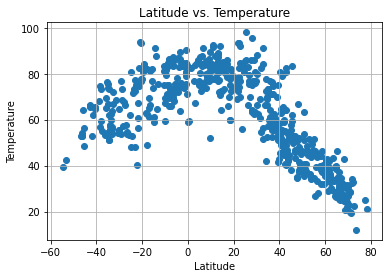

<Figure size 432x288 with 0 Axes>

In [10]:
LT= df['Latitud']
Temp= df['Temperatura']
plt.scatter(LT,Temp)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_Temperature.png')

## Latitude vs. Humidity Plot

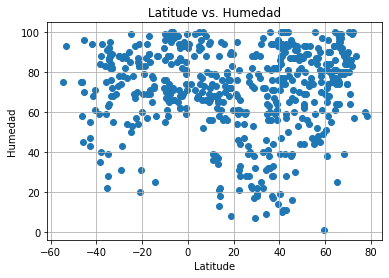

<Figure size 432x288 with 0 Axes>

In [11]:
LT= df['Latitud']
Humedad= df['Humidity']
plt.scatter(LT,Humedad)
plt.title('Latitude vs. Humedad')
plt.xlabel('Latitude')
plt.ylabel('Humedad')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_Humidity.png')

## Latitude vs. Cloudiness Plot

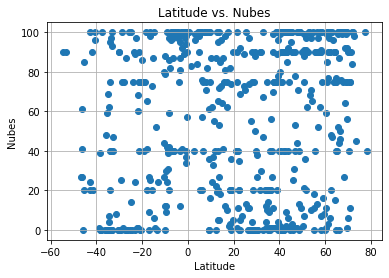

<Figure size 432x288 with 0 Axes>

In [12]:
LT= df['Latitud']
Nubes= df['Nubes']
plt.scatter(LT,Nubes)
plt.title('Latitude vs. Nubes')
plt.xlabel('Latitude')
plt.ylabel('Nubes')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_Nubes.png')

## Latitude vs. Wind Speed Plot

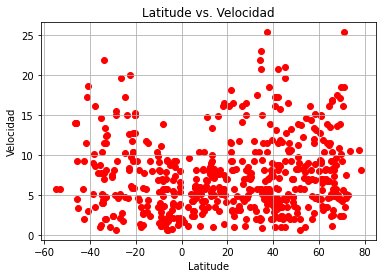

<Figure size 432x288 with 0 Axes>

In [13]:
LT= df['Latitud']
Velocidad= df['Velocidad']
plt.scatter(LT,Velocidad,c='red')
plt.title('Latitude vs. Velocidad')
plt.xlabel('Latitude')
plt.ylabel('Velocidad')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_Velocidad.png')

## Linear Regression

In [14]:
x=df[df['Latitud']>0]['Latitud']
y=df[df['Latitud']>0]['Temperatura']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

r2

'y=-0.9036382026432193 x+92.78862700345283'

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

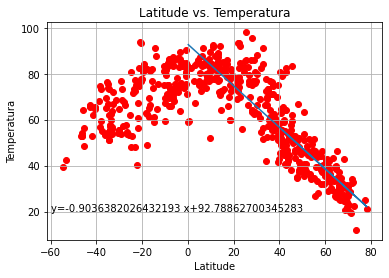

<Figure size 432x288 with 0 Axes>

In [15]:
x=df[df['Latitud']>0]['Latitud']
y=df[df['Latitud']>0]['Temperatura']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Temperatura= df['Temperatura']
plt.scatter(LT,Temperatura,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Temperatura')
plt.xlabel('Latitude')
plt.ylabel('Temperatura')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_TemperaturaNorth.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

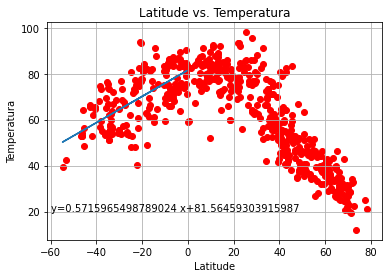

<Figure size 432x288 with 0 Axes>

In [16]:
x=df[df['Latitud']<0]['Latitud']
y=df[df['Latitud']<0]['Temperatura']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Temperatura= df['Temperatura']
plt.scatter(LT,Temperatura,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Temperatura')
plt.xlabel('Latitude')
plt.ylabel('Temperatura')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_TemperaturaSouth.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

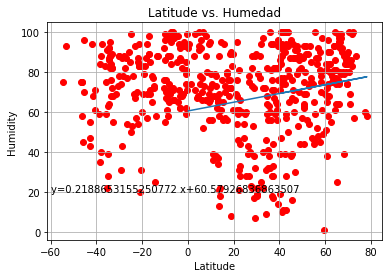

<Figure size 432x288 with 0 Axes>

In [17]:
x=df[df['Latitud']>0]['Latitud']
y=df[df['Latitud']>0]['Humidity']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Humedad= df['Humidity']
plt.scatter(LT,Humedad,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Humedad')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_HumedadNorth.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

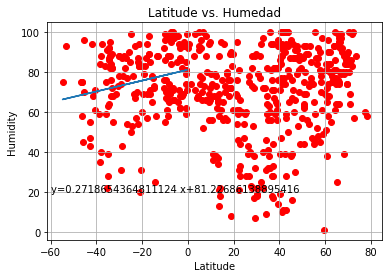

<Figure size 432x288 with 0 Axes>

In [18]:
x=df[df['Latitud']<0]['Latitud']
y=df[df['Latitud']<0]['Humidity']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Humedad= df['Humidity']
plt.scatter(LT,Humedad,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Humedad')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_HumedadSouth.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

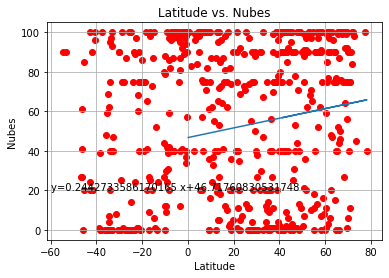

<Figure size 432x288 with 0 Axes>

In [19]:
x=df[df['Latitud']>0]['Latitud']
y=df[df['Latitud']>0]['Nubes']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Nubes= df['Nubes']
plt.scatter(LT,Nubes,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Nubes')
plt.xlabel('Latitude')
plt.ylabel('Nubes')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_NubesNorth.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

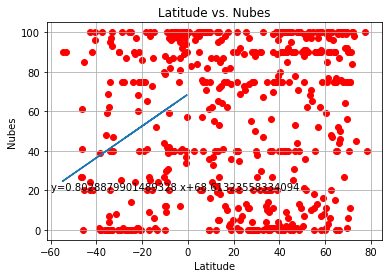

<Figure size 432x288 with 0 Axes>

In [20]:
x=df[df['Latitud']<0]['Latitud']
y=df[df['Latitud']<0]['Nubes']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Nubes= df['Nubes']
plt.scatter(LT,Nubes,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Nubes')
plt.xlabel('Latitude')
plt.ylabel('Nubes')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_NubesSouth.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

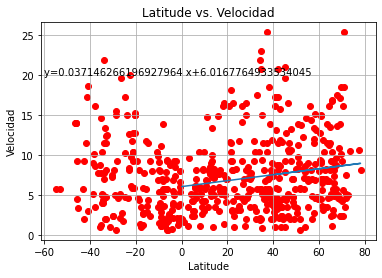

<Figure size 432x288 with 0 Axes>

In [21]:
x=df[df['Latitud']>0]['Latitud']
y=df[df['Latitud']>0]['Velocidad']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Velocidad= df['Velocidad']
plt.scatter(LT,Velocidad,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Velocidad')
plt.xlabel('Latitude')
plt.ylabel('Velocidad')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_VelocidadNorth.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

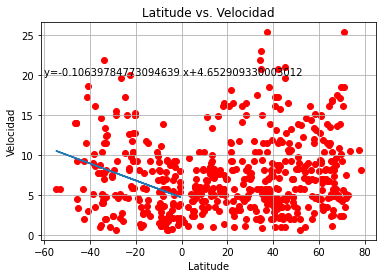

<Figure size 432x288 with 0 Axes>

In [22]:
x=df[df['Latitud']<0]['Latitud']
y=df[df['Latitud']<0]['Velocidad']
(slope,intercep,rvalue,pvalue,stderr)=linregress(x,y)
regre=x*slope+intercep
r2='y='+str(slope)+" x+"+str(intercep)

LT= df['Latitud']
Velocidad= df['Velocidad']
plt.scatter(LT,Velocidad,c='red')
plt.plot(x,regre)
plt.annotate(r2,(-60,20))
plt.title('Latitude vs. Velocidad')
plt.xlabel('Latitude')
plt.ylabel('Velocidad')
plt.grid(which='major')
plt.grid(which='minor')
plt.show()
plt.savefig('Latitude_VelocidadSouth.png')

In [24]:
df.to_csv('weather.csv')